In [ ]:
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 0s (3,772 kB/s)
Selecting previously unselected package rar.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install -q keras

In [ ]:
pip install -q -U opencv-python

In [1]:
import os
import cv2
import matplotlib.pyplot as plt


In [2]:
path = '/content/drive/My Drive/animals/training_set/'

In [3]:
# animal categories
categories = ['cats','dogs', 'panda']

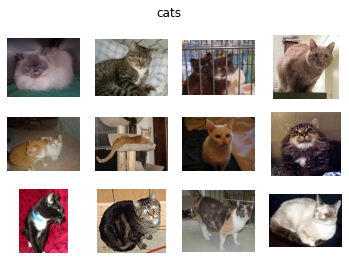

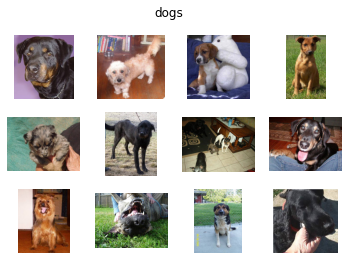

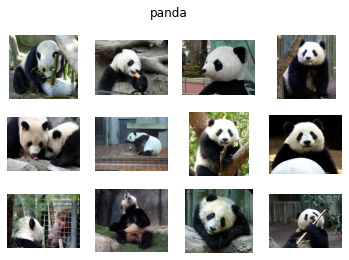

In [4]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [ ]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    

NameError: ignored

In [5]:
#Preprocess data and label inputs
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 64
WIDTH = 64
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'cats', k=1 : 'dogs', k=2 : ''

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)
print(labels)

[['/content/drive/My Drive/animals/training_set/dogs/dogs_00952.jpg', 1], ['/content/drive/My Drive/animals/training_set/panda/panda_00607.jpg', 2], ['/content/drive/My Drive/animals/training_set/panda/panda_00242.jpg', 2], ['/content/drive/My Drive/animals/training_set/cats/cats_00242.jpg', 0], ['/content/drive/My Drive/animals/training_set/panda/panda_00297.jpg', 2], ['/content/drive/My Drive/animals/training_set/cats/cats_00075.jpg', 0], ['/content/drive/My Drive/animals/training_set/cats/cats_00838.jpg', 0], ['/content/drive/My Drive/animals/training_set/dogs/dogs_00921.jpg', 1], ['/content/drive/My Drive/animals/training_set/cats/cats_00459.jpg', 0], ['/content/drive/My Drive/animals/training_set/cats/cats_00506.jpg', 0]]
[1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2

In [6]:
# scale the raw pixel intensities to the range [0, 1]
import numpy as np

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print(labels)

[1 2 2 ... 2 2 1]


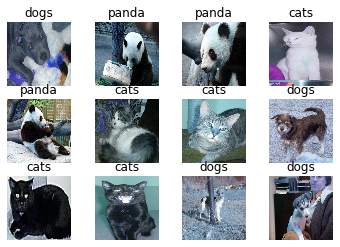

In [7]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [8]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.10, random_state=42)

In [9]:
from keras.utils import np_utils
trainY = np_utils.to_categorical(trainY, 3)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2700, 64, 64, 3)
(300, 64, 64, 3)
(2700, 3)
(300,)


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout


In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 64)         

In [22]:
model.fit(trainX, trainY, batch_size=32, epochs=25, verbose=1)

Epoch 1/25
85/85 [==============================] - 1s 13ms/step - loss: 1.0380 - accuracy: 0.4278
Epoch 2/25
85/85 [==============================] - 1s 12ms/step - loss: 0.8094 - accuracy: 0.5630
Epoch 3/25
85/85 [==============================] - 1s 12ms/step - loss: 0.7672 - accuracy: 0.5956
Epoch 4/25
85/85 [==============================] - 1s 11ms/step - loss: 0.7169 - accuracy: 0.6126
Epoch 5/25
85/85 [==============================] - 1s 11ms/step - loss: 0.7006 - accuracy: 0.6148
Epoch 6/25
85/85 [==============================] - 1s 11ms/step - loss: 0.6746 - accuracy: 0.6333
Epoch 7/25
85/85 [==============================] - 1s 11ms/step - loss: 0.6472 - accuracy: 0.6448
Epoch 8/25
85/85 [==============================] - 1s 11ms/step - loss: 0.6323 - accuracy: 0.6744
Epoch 9/25
85/85 [==============================] - 1s 11ms/step - loss: 0.6161 - accuracy: 0.6878
Epoch 10/25
85/85 [==============================] - 1s 11ms/step - loss: 0.5791 - accuracy: 0.7041
Epoch 11/

In [23]:
from numpy import argmax
from sklearn.metrics import confusion_matrix,accuracy_score
pred=model.predict(testX)
predictions = argmax(pred, axis=1) 
cm = confusion_matrix(testY, predictions)
cm

array([[78, 30,  6],
       [23, 58,  8],
       [ 0,  6, 91]])

In [24]:
accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))

Accuracy : 75.67%


In [25]:
test_data=[]
test_image_o=cv2.imread('/content/drive/My Drive/animals/single_prediction/panda_00471.jpg')
test_image=cv2.resize(test_image_o,(WIDTH,HEIGHT))# .flatten()
test_data.append(test_image)

# scale the raw pixel intensities to the range [0, 1]
test_data=np.array(test_image,dtype="float")/255.0
test_data=test_data.reshape([-1,64, 64, 3])
pred = model.predict(test_data)
predictions = argmax(pred, axis=1) # return to label
print ('Prediction : '+categories[predictions[0]])

Prediction : panda


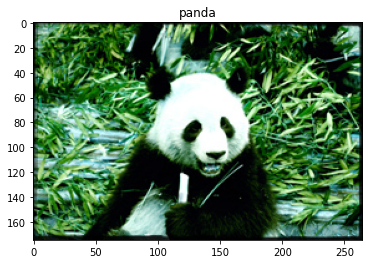

In [26]:
#Imersing into the plot
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title(categories[predictions[0]])
plt.imshow(test_image_o)

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/animals/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/animals/test-set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
CNN_Classifier.fit(
        training_set,
        steps_per_epoch=2000,
        epochs=10,
        validation_data=test_set,
        validation_steps=800)

Found 3000 images belonging to 3 classes.
Found 1590 images belonging to 3 classes.
Epoch 1/10
  65/2000 [..............................] - ETA: 4:52:53 - loss: 1.0891 - accuracy: 0.3687